In [1]:
"""
Author : Sanjay Marreddi
Date   : 13-12-2020
"""

# Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def count_frequencies(data, relative = False):
    counter = {}
    for element in data:
        if element not in counter:
            counter[element] = 1
        else:
            counter[element] += 1
    if relative:
        for element in counter:
            counter[element] = counter[element]/ len(data)
    return counter

Text(0, 0.5, 'Steady State Probability')

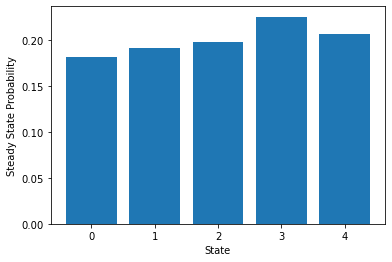

In [3]:
k = 5
p = 1/4
q = 1/4
startState = 0

prob = np.array([[1-p,p,0,0,0],[q,1-p-q,p,0,0],[0,q,1-p-q,p,0],[0,0,q,1-p-q,p],[0,0,0,q,1-q]])

numOfSamples = 1000
markovChainRun = 100
states =  list(range(k))

sampleRuns = np.zeros(numOfSamples)

for currItx in range(numOfSamples):
    currState = startState

    # Run the markov chain for 100 steps
    for step in range(markovChainRun):
    
        temp = prob[currState:currState+1,:].tolist()
        
        req = np.array(temp)
        
        nextState = np.random.choice(a = states,size= 1,p=req[0],replace = True) 
        
        currState = nextState[0]
    
    sampleRuns[currItx] = currState
        
pmfEst = count_frequencies(sampleRuns, True)
plt.bar(pmfEst.keys(), pmfEst.values())



plt.xlabel("State")
plt.ylabel("Steady State Probability")

## Theoretical Calculation gives all the steady state probabilities as equal to `0.2` which is a close approximate to the estimates of Probabilities as shown above